In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df=pd.read_csv("seattle-weather.csv")

In [9]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [10]:
df.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


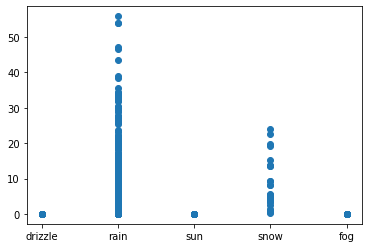

In [18]:
plt.scatter(df['weather'],df['precipitation'])
plt.show()

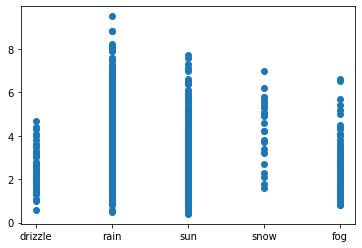

In [19]:
plt.scatter(df['weather'],df['wind'])
plt.show()

<AxesSubplot:>

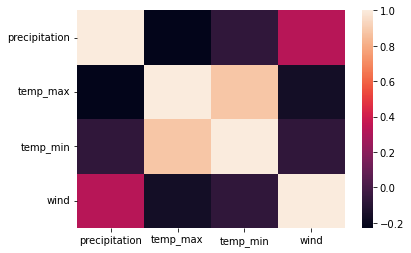

In [21]:
sns.heatmap(df.corr())

In [27]:
df.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [30]:
df.duplicated().any()

False

In [31]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [37]:
df=df.drop(["date"],axis=1)

In [34]:
lc= LabelEncoder()

In [35]:
df['weather']=lc.fit_transform(df['weather'])

In [38]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [48]:
y = df['weather']
features =['temp_max', 'temp_min', 'precipitation', 'wind']
x = df[features]
lc = LabelEncoder()
df["weather"] = lc.fit_transform(df["weather"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
knn = KNeighborsClassifier()
knnmodel = knn.fit(x_train, y_train)
knnscore = knn.score(x_test, y_test)*100
print("Accuracy of KNN model is: %.2f"%knnscore)

Accuracy of KNN model is: 77.47
